In [1]:
! pip install rdkit catboost selfies -q

In [41]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from rdkit.Chem.Descriptors import ExactMolWt
from pred import CatLgKPredictor
import selfies as sf

import numpy as np

In [42]:
chelates = ['CC(=O)NC1=C2SSC=C2NC1=O', 'OC(CS)C(O)CS','C@@1(OC=2C=C(O)C=C(O)C2C[C@H]1O)([H])C3=CC(=O)C(=C4C(=C3)C([C@]5(OC=6C=C(O)C=C(O)C6C[C@H]5O)[H])=CC(O)=C4O)O' 'OC(=O)CC(O)(CC(O)=O)C(O)=O', 'OC[C@@HC@@HC@HC@@HC(O)=O', 'OC(=O)C@@HC@@HC(O)=O', 'Oc1c(I)cc(Cl)c2cccnc12', 'O=C(O)CN(CC1)CCN(CC(=O)O)CCN(CC(=O)O)CCN1CC(=O)O', 'OCC(S)CS', 'C1CSCCSCCS1', 'CC(C)(S)C@@HC(O)=O', 'C1=CN=C(C=C1)C1=CC=CC=N1', 'CCCCC(O)(Cn1cncn1)c1ccc(Cl)cc1Cl', 'H+].[Cl-].C[C@@HNC(=O)C1)N1CC(=O)NC(=O)C1', 'C(=S)(S)N(CC)CC', 'Cc1cc(-c2ccc(cc2)S(O)(=O)=O)c2ccc3c(cc(C)nc3c2n1)-c1ccc(cc1)S(O)(=O)=O', 'OC(=O)CN(CCOCCOCCN(CC(O)=O)CC(O)=O)CC(O)=O', 'OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O', 'CC(O)(P(O)(O)=O)P(O)(O)=O', 'OC(=O)CNCC(O)=O', 'OP(O)(=O)CP(O)(O)=O', 'N1=C(C=CC2=CC=C3C=CC(=NC3=C12)C)C', 'OC(=O)CN1CCCN(CCN(CCCN(CC1)CC(O)=O)CC(O)=O)CC(O)=O', 'CN1C(=O)C(NC(C)=O)=C2SSC=C12', 'CCCCCCCc1cc(O)c2ccccc2n1']
additional_chelates = ['O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(O)O)CCN(CC(=O)O)CC1', 'C=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[CH]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(C[C+O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCH]N(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=NO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN(CC(=O)O)C1CCCCC1N(CC(=O)O)CC(=O)O', 'O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCNCCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=PO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[CH]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CCCO)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CC(=O)O)CCN(CCCO)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[C]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[CH]N1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(CC(=O)O)CCN(C[C+O)CC1', 'CCCC@@HO)CC(=O)O)N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCN(CCCO)CCN([N]C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)CO)CCN(CC(=O)O)CC1', 'O=C(O)CN1[C]CN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=COCN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(OC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[C]CN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'CCCCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O', 'O=C(O)[C]N1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[C]CN(CC(=O)O)CCN(CC(=O)O)CCN(CCCO)CC1', 'O=C(O)CN1CCN(CCCO)CCN(NC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN(C[C]1CCCCC1N(CC(=O)O)CC(=O)O)CC(=O)O', 'CC1N(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN1CC(=O)O', 'O=C(O)CN1CCN(CCCO)CCN([O+]C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)C[N]N(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(C=C(O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'CC=CCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCN(CCCO)CCN(CNC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CNN1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN(CC(=O)O)[C@@H]1CC=CC[C@H]1N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCN(CC(=O)O)CCN(CCCO)OCN(CC(=O)O)CC1', 'O=C(O)COCN1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'CC1N(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CCN1CC(=O)O', 'O=C(O)[CH-]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O', 'O=C(O)CN1C[CH]NCCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCNCCN(NC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[C-]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1']
new_add =['O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(C(=O)O)CCN(CC(=O)O)CC1', 'N=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(O)O)CCN(CC(=O)O)CC1', 'C=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[CH]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[N]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCNO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1C[CH]N(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=NO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[N+]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[C]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCN(CCOO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCNCCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=PO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC#CO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[CH]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCSO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CCCO)CCN(CC(=O)O)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CC(=O)O)CCN(CCCO)CC1', 'O=C(O)CN1[CH]CN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[C]N1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1C[C]N(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1C[CH]N(C(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC#[PH]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)[CH]N1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=[S]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=CNCN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[P]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[CH-]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[SH]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC[P@H]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'CCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O', 'CCC[C@@HO)CC(=O)O)N(CC(=O)O)CC(=O)O', 'O=C(O)CN1CCN(NC(=O)O)CCN(CCCO)CCN(C(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN([N]C(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CNC(=O)O)CCN(CCCO)CCN(C(=O)O)CC1', 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)CO)CCN(CC(=O)O)CC1', 'O=C(O)CN1[C]CN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=COCN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CC=[N+]O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1CCN(CCCO)CCN(OC(=O)O)CCN(CC(=O)O)CC1', 'O=C(O)CN1[C]CN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1', 'CCCCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O', 'O=C(O)[C]N1CCN(CCCO)CCN(CC(=O)O)CCN(CC(=O)O)CC1']


chelates+=additional_chelates
chelates+=new_add


al = []
for i in chelates:
  try:
    if Chem.MolFromSmiles(i):
      al.append(i)
  except Exception:
    pass

chelates = al

[04:38:48] SMILES Parse Error: syntax error while parsing: C@@1(OC=2C=C(O)C=C(O)C2C[C@H]1O)([H])C3=CC(=O)C(=C4C(=C3)C([C@]5(OC=6C=C(O)C=C(O)C6C[C@H]5O)[H])=CC(O)=C4O)OOC(=O)CC(O)(CC(O)=O)C(O)=O
[04:38:48] SMILES Parse Error: Failed parsing SMILES 'C@@1(OC=2C=C(O)C=C(O)C2C[C@H]1O)([H])C3=CC(=O)C(=C4C(=C3)C([C@]5(OC=6C=C(O)C=C(O)C6C[C@H]5O)[H])=CC(O)=C4O)OOC(=O)CC(O)(CC(O)=O)C(O)=O' for input: 'C@@1(OC=2C=C(O)C=C(O)C2C[C@H]1O)([H])C3=CC(=O)C(=C4C(=C3)C([C@]5(OC=6C=C(O)C=C(O)C6C[C@H]5O)[H])=CC(O)=C4O)OOC(=O)CC(O)(CC(O)=O)C(O)=O'
[04:38:48] SMILES Parse Error: syntax error while parsing: OC[C@@HC@@HC@HC@@HC(O)=O
[04:38:48] SMILES Parse Error: Failed parsing SMILES 'OC[C@@HC@@HC@HC@@HC(O)=O' for input: 'OC[C@@HC@@HC@HC@@HC(O)=O'
[04:38:48] SMILES Parse Error: syntax error while parsing: OC(=O)C@@HC@@HC(O)=O
[04:38:48] SMILES Parse Error: Failed parsing SMILES 'OC(=O)C@@HC@@HC(O)=O' for input: 'OC(=O)C@@HC@@HC(O)=O'
[04:38:48] SMILES Parse Error: syntax error while parsing: CC(C)(S)C@@HC(O)=

In [43]:
from collections import Counter
from rdkit.Contrib.SA_Score import sascorer

data = pd.read_csv("logK.csv")

def check_molecule(smiles):
    # Разрешенные элементы и элементы для подсчета атомов
    allowed_elements = {'C', 'H', 'O', 'N', 'P', 'S'}
    count_elements = {'O', 'N', 'P', 'S'}

    # Счетчик элементов в молекуле
    elements_counter = Counter()
    temp_element = '' # Временная переменная для хранения элементов более одного символа

    for char in smiles:
        if char.isalpha():
            # Проверяем, является ли элемент двухбуквенным (например, Cl) - не применимо к данным элементам, но полезно для общности
            if temp_element:
                # Предыдущий элемент был начат, завершаем его
                elements_counter[temp_element] += 1
                temp_element = ''
            if char.isupper():
                # Начало нового элемента
                elements_counter[char] += 1
            else:
                # Продолжение текущего элемента
                temp_element += char
        elif temp_element:
            # Если был накоплен временный элемент, добавляем его в счетчик
            elements_counter[temp_element] += 1
            temp_element = '' # Сброс временного элемента

    # Проверяем, входит ли последний элемент в счетчик, если цикл завершился на букве
    if temp_element:
        elements_counter[temp_element] += 1

    # Проверка условий
    # 1. Все элементы в молекуле должны быть из разрешенного списка
    if not all(element in allowed_elements for element in elements_counter):
        print('# 1. Все элементы в молекуле должны быть из разрешенного списка')
        return False

    # 2. Молекула должна включать не менее трех разных элементов из списка
    if sum(element in allowed_elements for element in elements_counter) < 3:
        print('# 2. Молекула должна включать не менее трех разных элементов из списка')
        return False

    # 3. Суммарно не более 12 атомов элементов O, N, P, S
    if sum(count for element, count in elements_counter.items() if element in count_elements) > 12:
        print('# 3. Суммарно не более 12 атомов элементов O, N, P, S')
        return False
    
    if smiles in data["smiles"].tolist():
      return True

    weight = ExactMolWt(Chem.MolFromSmiles(smiles))
    if weight > 500: 
        print('Вес: ', weight)
        return False

    if sascorer.calculateScore(Chem.MolFromSmiles(smiles))>5: 
        print('Sas > 5', sascorer.calculateScore(Chem.MolFromSmiles(smiles)))
        return False
        

    return True

# Тестирование функции на нескольких молекулах из датасета


In [44]:
sub = pd.DataFrame({"smiles": chelates})

sub = sub.rename(columns={0:"smiles"})

sub.shape

(114, 1)

In [45]:
checked = [check_molecule(smiles) for smiles in sub["smiles"]]

sub = sub.iloc[checked]

can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(m), isomericSmiles=True, canonical=True) for m in sub.smiles.tolist()]

can_smiles = list(set(can_smiles))
sub_can = pd.DataFrame({"smiles": can_smiles})

sub_can.shape

# 1. Все элементы в молекуле должны быть из разрешенного списка
# 2. Молекула должна включать не менее трех разных элементов из списка
# 2. Молекула должна включать не менее трех разных элементов из списка
# 1. Все элементы в молекуле должны быть из разрешенного списка
# 1. Все элементы в молекуле должны быть из разрешенного списка
# 2. Молекула должна включать не менее трех разных элементов из списка
# 1. Все элементы в молекуле должны быть из разрешенного списка


(79, 1)

In [46]:
model = CatLgKPredictor('./mymodel')
sub_can["lgk"] = model.predict_lgK(pd.DataFrame({'smiles': sub_can["smiles"].values}))

sub_can.reset_index(drop=True, inplace=True)

sub_can.shape

(79, 2)

In [47]:
from rdkit import DataStructs

def return_unsimilar(sub: pd.DataFrame):
    sub = sub.copy()
    
    ms = [Chem.MolFromSmiles(sm) for sm in sub['smiles']]
    fpgen = AllChem.GetRDKitFPGenerator()
    fps = [fpgen.GetFingerprint(x) for x in ms]
    sim = 0
    for i in range(len(fps)):
        for j in range(i+1, len(fps)):
            try:
                if DataStructs.TanimotoSimilarity(fps[i], fps[j]) > 0.5:
                    if sub["lgk"][i]>=sub["lgk"][j] and sub["lgk"][j]<sub['lgk'].mean():
                        sub.drop(labels=[j], inplace=True)
                    elif sub["lgk"][i]<sub["lgk"][j] and sub["lgk"][i]<sub['lgk'].mean():
                        sub.drop(labels=[i], inplace=True)
            except KeyError:
                pass
    return sub

In [48]:
sub_can_sim = return_unsimilar(sub_can)
sub_can_sim.head()

,smiles,lgk
0,O=C(O)CN1[C]CN(CC(=O)O)CCN(CC(=O)O)CCN(CCCO)CC1,20.327997
1,O=C(O)CN1CCN(CNC(=O)O)CCN(CCCO)CCN(C(=O)O)CC1,20.723457
2,O=C(O)CN1CCN(CCCO)CCN([O+]C(=O)O)CCN(CC(=O)O)CC1,20.080895
3,OC(CS)C(O)CS,5.358843
4,CC=CCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O,19.971487


In [49]:
sub_can_sim.sort_values(by="lgk", ascending=False)["lgk"][:100].mean()

19.445796805377306

In [50]:
data.sort_values(by="lgK", ascending=False).head()

,id,smiles,lgK
191,193,O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n...,29.30
149,151,O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,28.60
150,152,O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C...,25.50
136,137,O=P(O)(O)CN1CCN(CP(=O)(O)O)CCN(CP(=O)(O)O)CCN(...,24.78
71,72,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)C...,24.26


In [51]:
from pred import CatLgKPredictor
model = CatLgKPredictor("./mymodel")

In [52]:
da = pd.read_csv("./logK.csv")

In [53]:
da = data.sort_values(by="lgK", ascending=False).loc[data["lgK"]>21.5]
ind = []
for i in da["smiles"].tolist():
    try:
        predicted_log_k = model.predict_lgK(pd.DataFrame({"smiles": [sf.decoder(sf.encoder(i))]}))
        ind.append(sf.encoder(i))
    except Exception:
        pass

initial_population = ind

#ind += chelates

best_sub = pd.read_csv("./BBBEST_SUB.csv", header=None)
best_sub['lgk'] = model.predict_lgK(best_sub.rename(columns={0:"smiles"}))
best_sub = best_sub.sort_values(by="lgk", ascending=False).loc[best_sub["lgk"]>21.5]
ind_bs = []

for i in best_sub[0].tolist():
    try:
        predicted_log_k = model.predict_lgK(pd.DataFrame({"smiles": [sf.decoder(sf.encoder(i))]}))
        ind_bs.append(sf.encoder(i))
    except Exception:
        pass
    
ind+=ind_bs

ind += ['O=C(O)CN(CC1)CCN(CC(=O)O)CCN(CC(=O)O)CCN1CC(=O)O']

In [54]:
len(ind)

26

In [55]:
chelates = ['CC(=O)NC1=C2SSC=C2NC1=O', 'N[C@@H](CCN[C@@H](CCN1CC[C@H]1C(O)=O)C(O)=O)C(O)=O', 'OC(CS)C(O)CS','[C@@]1(OC=2C=C(O)C=C(O)C2C[C@H]1O)([H])C3=CC(=O)C(=C4C(=C3)C([C@]5(OC=6C=C(O)C=C(O)C6C[C@H]5O)[H])=CC(O)=C4O)O' 'OC(=O)CC(O)(CC(O)=O)C(O)=O', 'OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C(O)=O', 'OC(=O)[C@@H](S)[C@@H](S)C(O)=O', 'Oc1c(I)cc(Cl)c2cccnc12', 'O=C(O)CN(CC1)CCN(CC(=O)O)CCN(CC(=O)O)CCN1CC(=O)O', 'OCC(S)CS', 'C1CSCCSCCS1', 'CC(C)(S)[C@@H](N)C(O)=O', 'C1=CN=C(C=C1)C1=CC=CC=N1', 'CCCCC(O)(Cn1cncn1)c1ccc(Cl)cc1Cl', '[H+].[Cl-].C[C@@H](CN1CC(=O)NC(=O)C1)N1CC(=O)NC(=O)C1', 'C(=S)(S)N(CC)CC', 'Cc1cc(-c2ccc(cc2)S(O)(=O)=O)c2ccc3c(cc(C)nc3c2n1)-c1ccc(cc1)S(O)(=O)=O', 'OC(=O)CN(CCOCCOCCN(CC(O)=O)CC(O)=O)CC(O)=O', 'OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O', 'CC(O)(P(O)(O)=O)P(O)(O)=O', 'OC(=O)CNCC(O)=O', 'OP(O)(=O)CP(O)(O)=O', 'N1=C(C=CC2=CC=C3C=CC(=NC3=C12)C)C', 'OC(=O)CN1CCCN(CCN(CCCN(CC1)CC(O)=O)CC(O)=O)CC(O)=O', 'CN1C(=O)C(NC(C)=O)=C2SSC=C12', 'CCCCCCCc1cc(O)c2ccccc2n1']

In [56]:
initial_population[0]

'[O][=P][Branch1][C][O][Branch1][C][O][C][N][Branch2][Ring2][Ring2][C][C][=C][C][=C][C][Branch2][Ring1][#Branch1][C][N][Branch1][#Branch2][C][P][=Branch1][C][=O][Branch1][C][O][O][C][P][=Branch1][C][=O][Branch1][C][O][O][=N][Ring2][Ring1][C][C][P][=Branch1][C][=O][Branch1][C][O][O]'

In [57]:
from concurrent.futures import ThreadPoolExecutor
from rdkit.Chem.Descriptors import MolWt

valid_fragments = ['[O]', '[N]', '[C]', '[=O]', '[=N]', '[S]', 'P']

def count_onps_atoms(mol):
    """Count the total number of O, N, P, and S atoms in a molecule."""
    atom_counts = {symbol: 0 for symbol in ['O', 'N', 'P', 'S']}
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol in atom_counts:
            atom_counts[symbol] += 1
    return sum(atom_counts.values())

def evaluate_fitness(selfie, model):
    try:
        smi = sf.decoder(selfie)
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            return -1  # Use negative fitness for invalid molecules
        
        # Additional check for the number of O, N, P, S atoms
        #onps_count = count_onps_atoms(mol)
        #if onps_count > 12:
            #return -1  # Penalize molecules with more than 12 O, N, P, S atoms
        
        predicted_log_k = model.predict_lgK(pd.DataFrame({"smiles": [smi]}))
        if predicted_log_k[0] <= 20:
            return -1 # Penalize molecules with lgK <= 21
        
        # You might want to further differentiate fitness for lgK > 21.
        # This example simply returns the lgK value as the fitness score,
        # but you could scale it or add additional criteria.
        fitness_score = predicted_log_k
    except Exception:
        return -1
    return fitness_score


def parallel_evaluate_fitness(population, model):
    with ThreadPoolExecutor() as executor:
        scores = list(executor.map(evaluate_fitness, population, [model] * len(population)))
    return scores

def tournament_selection(population, scores, k=3):
    # Ensure k does not exceed the size of the population
    k = min(k, len(population))
    
    if len(population) == 0:
        raise ValueError("Population is empty.")
    
    selection_idxs = random.sample(range(len(population)), k)
    selected_scores = [scores[idx] for idx in selection_idxs]
    winner_idx = selection_idxs[selected_scores.index(max(selected_scores))]
    return population[winner_idx]

import selfies as sf
import random

def split_selfie_into_fragments(selfie):
    """Split a SELFIES string into a list of fragments (individual symbols)."""
    return sf.split_selfies(selfie)

def combine_fragments_into_selfie(fragments):
    """Combine a list of SELFIES fragments into a single SELFIES string."""
    return ''.join(fragments)

def find_common_fragments(parent1, parent2):
    """Find common fragments between two SELFIES strings."""
    fragments1 = set(split_selfie_into_fragments(parent1))
    fragments2 = set(split_selfie_into_fragments(parent2))
    common = fragments1.intersection(fragments2)
    return list(common) if common else None

def crossover(parent1, parent2):
    common_fragments = find_common_fragments(parent1, parent2)
    if not common_fragments:
        return parent1, parent2
    fragment_to_swap = random.choice(common_fragments)
    index1 = parent1.find(fragment_to_swap)
    index2 = parent2.find(fragment_to_swap)
    if index1 == -1 or index2 == -1:
        return parent1, parent2
    new_offspring1 = parent1[:index1] + parent2[index2:]
    new_offspring2 = parent2[:index2] + parent1[index1:]
    return new_offspring1, new_offspring2

def find_common_fragments(parent1, parent2):
    """Identify common SELFIES fragments between two parent molecules."""
    fragments1 = set(sf.split_selfies(parent1))
    fragments2 = set(sf.split_selfies(parent2))
    return list(fragments1.intersection(fragments2))

def enhanced_crossover(parent1, parent2):
    """Perform crossover on multiple common fragments if available."""
    common_fragments = find_common_fragments(parent1, parent2)
    
    if not common_fragments:
        # No common fragments; return parents as is
        return parent1, parent2
    
    # Split parents into fragments
    parent1_fragments = list(sf.split_selfies(parent1))
    parent2_fragments = list(sf.split_selfies(parent2))
    
    # Determine crossover points based on common fragments
    crossover_points = [i for i, frag in enumerate(parent1_fragments) if frag in common_fragments]
    if not crossover_points:
        return parent1, parent2  # In case there's no suitable crossover point
    
    # For simplicity, choose up to two random crossover points
    chosen_points = random.sample(crossover_points, min(2, len(crossover_points)))
    
    # Perform the crossover at chosen points
    new_offspring1_fragments = parent1_fragments[:]
    new_offspring2_fragments = parent2_fragments[:]
    
    for point in chosen_points:
        new_offspring1_fragments[point] = parent2_fragments[point]
        new_offspring2_fragments[point] = parent1_fragments[point]
    
    # Reconstruct SELFIES from the fragments and return
    new_offspring1 = ''.join(new_offspring1_fragments)
    new_offspring2 = ''.join(new_offspring2_fragments)
    
    return new_offspring1, new_offspring2

def mutate(selfie, mutation_rate=0.1):
    if random.random() > mutation_rate:
        return selfie  # No mutation occurs

    fragments = list(sf.split_selfies(selfie))  # Convert generator to list
    if not fragments:
        return selfie  # No mutation if the SELFIES is invalid or empty

    # Select a random fragment to replace
    mutation_index = random.randint(0, len(fragments) - 1)

    # Select a new random fragment from the valid list
    new_fragment = random.choice(valid_fragments)
    
    # Replace the fragment
    fragments[mutation_index] = new_fragment
    mutated_selfie = ''.join(fragments)  # This results in a valid SELFIES string, no need to encode

    # Decode to SMILES for chemical validity and molecular weight checks
    smi = sf.decoder(mutated_selfie)  # Convert mutated SELFIES back to SMILES for RDKit processing
    mol = Chem.MolFromSmiles(smi)

    return mutated_selfie

def run_ga(population, generations=40):
    for generation in range(generations):
        scores = parallel_evaluate_fitness(population, model)
        # Ensure only valid scores are selected for breeding
        valid_indices = [i for i, score in enumerate(scores) if score > -1]
        valid_population = [population[i] for i in valid_indices]
        valid_scores = [scores[i] for i in valid_indices]
        
        new_population = []
        while len(new_population) < len(valid_population):
            parent1 = tournament_selection(valid_population, valid_scores)
            parent2 = tournament_selection(valid_population, valid_scores)
            offspring1, offspring2 = crossover(parent1, parent2)
            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)
            new_population.extend([offspring1, offspring2])
        population = new_population[:len(valid_population)]  # Adjust population size
    return population

run_ga(initial_population, 40)

[]

In [58]:
len(ind)

26

In [24]:
initial_population = ind

len(initial_population)

26

In [80]:
subs = []
subs_len = 0
while len(subs) <= 100:
    final_population = run_ga(initial_population, generations=10)
    fin_pop = [sf.decoder(i) for i in final_population]
    fin_pop = list(set(fin_pop))
    
    can_fin_pop = [Chem.MolToSmiles(Chem.MolFromSmiles(m), isomericSmiles=True, canonical=True) for m in fin_pop]
    can_fin_pop = list(set(can_fin_pop))
    
    subs += can_fin_pop
    
    subs = list(set(subs))
    
    # logging
    if subs_len != len(subs):
        print(len(subs))
        print(subs)
        
    subs_len = len(subs)
    
    pppps = model.predict_lgK(pd.DataFrame({'smiles': subs}))
    
    
    for l in range(len(pppps)):
        if pppps[l] > 21:
            initial_population.append(subs[l])

subs

1
['O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1']
2
['O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n1)CP(=O)(O)O', 'O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1']
Object info sizes: 1 1234
3
['O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n1)CP(=O)(O)O', 'O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1']
4
['C=CC(=CC=O)CP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n1)CP(=O)(O)O', 'O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1']
5
['O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=C(O)CCP(=O)(O)CN1CCOC(=O)NCCN(C(=O)O)CCN(C(=O)O)CC1', 'C=CC(=CC=O)CP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n1)CP(=O)(O)O']
6
['O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1', 'O=C(O)CCP(=O)(O)CN1CC

KeyboardInterrupt: 

In [81]:
valid_smiles = []

subs1 = subs#['O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1']
# valid checking
for sm in subs1:
    if check_molecule(sm):
        valid_smiles.append(sm)
    else:
        #print('Failed check')
        pass

# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 1. Все элементы в молекуле должны быть из разрешенного списка
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 3. Суммарно не более 12 атомов элементов O, N, P, S
# 1. Все элементы 

In [82]:
valid_smiles

['N=CP(=O)(O)O',
 'N=C(C=CC=CCN(CP(=O)(O)O)CP(=O)(O)O)CN=O',
 'O=CCN(C=O)CCN(CCNCC(=O)O)CC(=O)O',
 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1',
 'O=CNCP(=O)(O)O',
 'O=C(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1',
 'O=CCCN1CCC(NCOCC(=O)O)CN(C(=O)O)CCN(C(=O)O)CC1',
 'O=CCN(CCN(CCNC(=O)O)CP(=O)(O)O)C(=O)O',
 'CCN(CCN(CCNC(=O)O)CP=O)C(=O)O']

In [83]:
test = subs1

test_preds = model.predict_lgK(pd.DataFrame({'smiles': test}))
p, predds = [], []
for s in range(len(test)):
    if test_preds[s] > 21:
        p.append(test[s])
        predds.append(test_preds[s])

np.mean(predds), max(predds), min(predds)

(23.64055734826607, 29.016022672675394, 21.136856797652875)

In [84]:
len(predds)

58

In [85]:
generated_df = pd.DataFrame({'smiles': p, 'lgK': predds})
generated_df.head()

,smiles,lgK
0,O=C(O)CN1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,24.607004
1,O=C(O)NCCN(CCN(CCN(CCO)C(=O)O)C(=O)O)CP(=O)(O)O,21.136857
2,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)C...,24.048837
3,O=C(O)N1CCN(CP(=O)(O)O)CCN(CP(=O)(O)O)CCN(C(=O...,24.994554
4,O=C(O)N1CCN(C(=O)O)CC[SH](CP(=O)(O)CC[PH](=O)O...,22.763238


In [86]:
generated_df.sort_values(by='lgK', ascending=False).to_csv(f'./generated/invalid_default_c_{generated_df["lgK"].mean()}.csv', index=False)

In [87]:
generated_df = pd.read_csv('./generated/invalid_default_c.csv')

generated_df.sort_values(by='lgK', ascending=False)

,smiles,lgK
0,O=P(O)(O)CN(Cc1cccc(CN(CP(=O)(O)O)CP(=O)(O)O)n...,29.016023
1,O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,28.399766
2,O=C(O)N1CCN(CS(O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,26.844821
3,O=C(O)N1CCN(C[SH](=O)(O)O)CCN(C(=O)O)CCN(C(=O)...,26.354942
4,O=C(O)N1CCN(CP(=O)(O)CC[PH](=O)O)CCN(C(=O)O)CC...,26.144873
...,...,...
64,O=C1NCCN(C(=O)O)CCN(C(=O)O)CCN(CP(=O)(O)O)CCO1,21.191189
65,O=C(O)N1CCN(COCOO)CCN(C(=O)O)CCN(C(=O)O)CC1,21.170851
66,O=C(O)N1CCN(COCOCN(CCNCP(=O)(O)O)C(=O)P)CCN(C(...,21.159745
67,CN1CCN(C(O)O)CCN(C(=O)O)CCN(C(=O)O)CCOP1(=O)O,21.122725


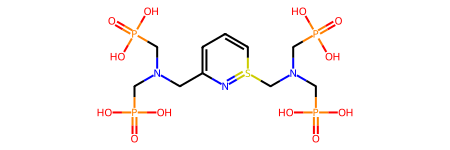

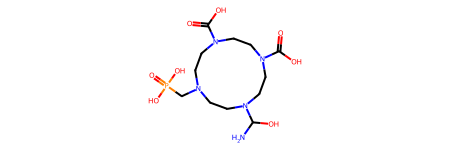

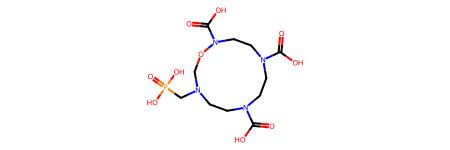

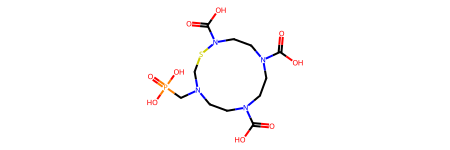

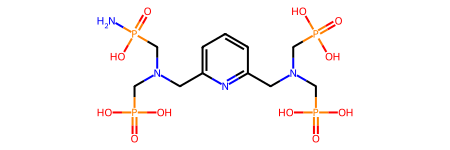

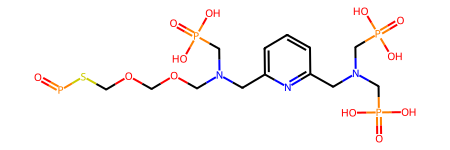

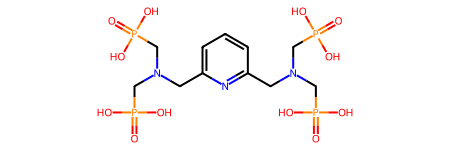

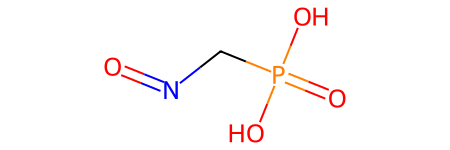

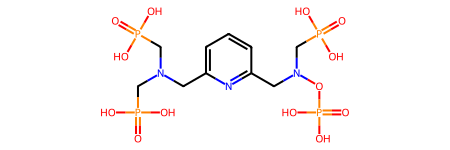

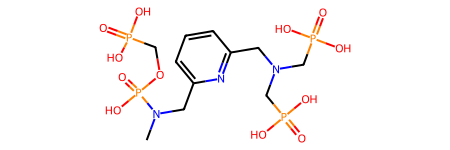

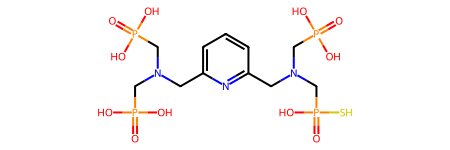

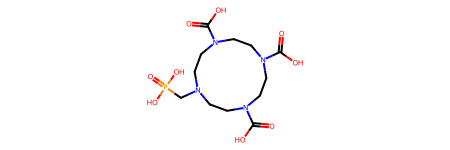

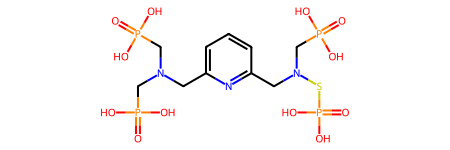

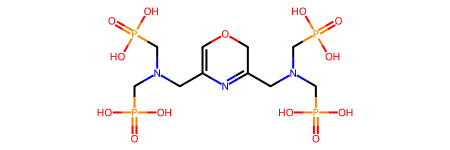

In [39]:
tt_smiles = generated_df['smiles']
for sm in tt_smiles:
    display(Chem.MolFromSmiles(sm))